## Домашнее задание №2

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [39]:
df = pd.read_csv('homework.csv')

Housing Values in Suburbs of Boston
Data description

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:
- **crim**: количество преступлений на душу населения (per capita crime rate by town)
- **zn**: процент жилых участков площадью св. 25 тыс.кв.футов (proportion of residential land zoned for lots over 25,000 sq.ft)
- **indus**: процент площадей под оптовую торговлю (proportion of non-retail business acres per town)
- **chas**: протекает ли река (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))
- **nox**: концентрация оксидов азота (nitrogen oxides concentration (parts per 10 million))
- **rm**: среднее число комнат в здании (average number of rooms per dwelling)
- **age**: доля зданий, построенных до 1940 г. (proportion of owner-occupied units built prior to 1940)
- **dis**: взвешенное расстояние до 5 деловых центров Бостона (weighted mean of distances to five Boston employment centres)
- **rad**: индекс доступности скоростных магистралей (index of accessibility to radial highways)
- **tax**: уровень налогов (full-value property-tax rate per USD10,000)
- **ptratio**: среднее число учащихся на одного преподавателя (pupil teacher ratio by town)
- **black**: доля афроамериканцев (1000(Bk-0.63)^2 where Bk is the proportion of blacks by town)
- **lstat**: доля населения с низким уровнем жизни (lower status of the population (percent))
- **medv**: медианная стоимости домов в районе (median value of owner-occupied homes in USD1000s)

    Источник данных: https://www.kaggle.com/c/boston-housing/overview

In [40]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [41]:
# df.columns[1:14]
df.iloc[:, 1:].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [42]:
# все данные - числовые (chas - бинарная), пропусков нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [43]:
df.iloc[:, 1:].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [19]:
# boxplot = df.iloc[:, 1:].boxplot(figsize=(15,6), rot=90)
# boxplot = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'lstat', 'medv']].boxplot(figsize=(15,6), rot=90)

In [20]:
# df[['tax', 'black', 'age']].boxplot(figsize=(8,6), rot=90)

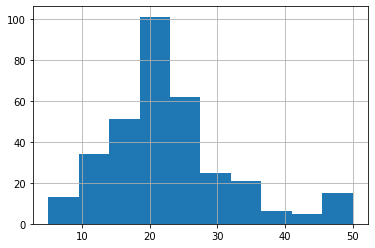

In [44]:
df['medv'].hist() # целевой (прогнозируемый) показатель, меняется в диапазоне от 5 до 50 тыс. долл.

In [27]:
# смотрим зависимости целевого признака от остальных:
# sns_plot = sns.pairplot(df.iloc[:, 1:]) # на основе каких столбцов строим
# sns_plot

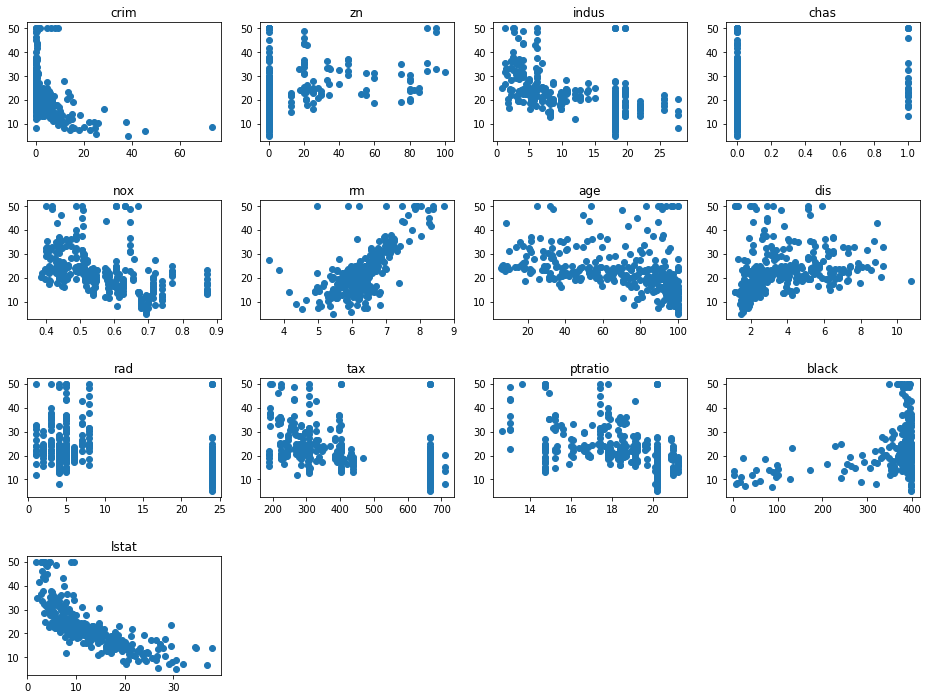

In [45]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns[1:14]):
    plt.subplot(4, 4, i + 1)
    plt.scatter(df[col], df['medv'])
    plt.subplots_adjust(hspace=0.5)
    plt.title(col, size=12)

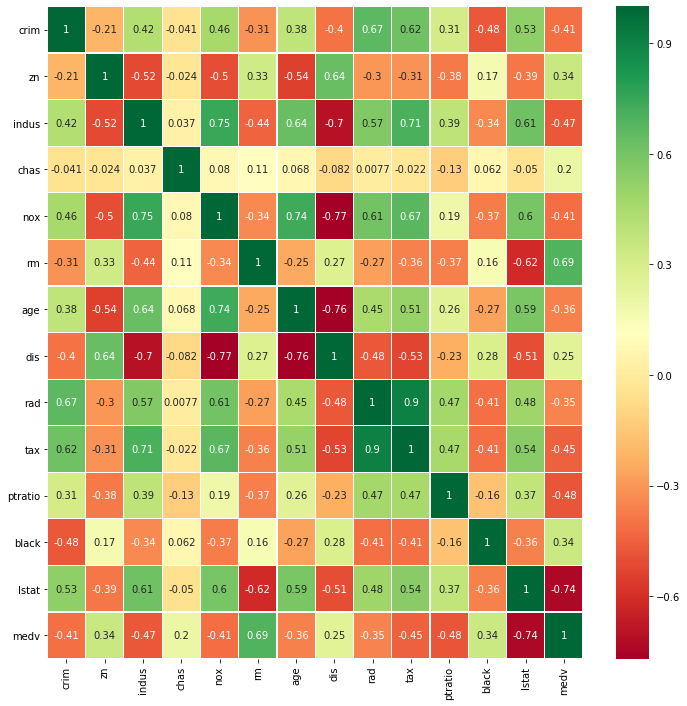

In [46]:
sns.heatmap(df.iloc[:, 1:].corr(),annot=True,cmap='RdYlGn', linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf() # gcf() - получение текущей фигуры
fig.set_size_inches(12,12) # set_size_inches() - установить размер фигуры
plt.show()

#### LinearRegression

In [47]:
model = LinearRegression()

In [48]:
df_ = df.drop(['medv', 'ID'], axis=1)
# df_.head()

In [49]:
# подготовим данные
# X, y = df.drop(['medv', 'ID'], axis=1).values, df['medv'].values
X, y = df_.values, df['medv'].values

In [50]:
train_part_size = int(0.7 * X.shape[0]) # размер обучающей выборки
X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :] # обучающая и отложенная части
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [51]:
# масштабируем данные
scaler = StandardScaler() # при обучении этот объект посчитает среднее и станд. отклонение по каждому признаку (обучится)
X_train_scaled = scaler.fit_transform(X_train) # масштабированная обучающая выборка (fit - обучение scaler, transform - возвращение масштабированной выборки)
X_valid_scaled = scaler.transform(X_valid) # масштабированная отложенная выборка (масштабирование с помощью посчитанных средних и станд. отклонений)

In [52]:
# обучение модели на масштабированных данных
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# формируем прогноз
y_pred = model.predict(X_valid_scaled)

In [54]:
# стандартное отклонение (среднеквадратическое отклонение) между ответами на отложенной выборке и прогнозами на масштабированной отложенной выборке
print('RMSE=%.2f' % mean_squared_error(y_valid, y_pred, squared=False))

RMSE=25.49


In [55]:
# коэффициент детерминации (какой процент наблюдений описывает данная модель?)
print('R^2 score=%.2f' % r2_score(y_valid, y_pred))

R^2 score=-8.03


In [56]:
# средняя абсолютная погрешность регрессии (прогноза)
print('MAE=%.2f' % mean_absolute_error(y_valid, y_pred))

MAE=18.01


In [57]:
# коэффициенты модели
pd.DataFrame(model.coef_, df_.columns, columns=['coef']).sort_values(by='coef', ascending=False) 

,coef
rm,6.394352
crim,1.062690
black,0.462223
zn,0.343165
rad,0.333969
indus,0.213515
chas,0.145599
lstat,-0.445700
nox,-1.034390
tax,-1.061235


In [113]:
# увеличение размера обучающей выборки с 70% до 80% позволяет увеличить точность (RMSE) в 3 раза:

In [58]:
train_part_size = int(0.8 * X.shape[0]) # размер обучающей выборки
X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :] # обучающая и отложенная части
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [59]:
# масштабируем данные
scaler = StandardScaler() # при обучении этот объект посчитает среднее и станд. отклонение по каждому признаку (обучится)
X_train_scaled = scaler.fit_transform(X_train) # масштабированная обучающая выборка (fit - обучение scaler, transform - возвращение масштабированной выборки)
X_valid_scaled = scaler.transform(X_valid) # масштабированная отложенная выборка (масштабирование с помощью посчитанных средних и станд. отклонений)

In [60]:
# обучение модели на масштабированных данных
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# формируем прогноз
y_pred = model.predict(X_valid_scaled)

In [62]:
# стандартное отклонение (среднеквадратическое отклонение) между ответами на отложенной выборке и прогнозами на масштабированной
# отложенной выборке
print('RMSE=%.2f' % mean_squared_error(y_valid, y_pred, squared=False))

RMSE=8.45


In [63]:
# коэффициент детерминации 
print('R^2 score=%.2f' % r2_score(y_valid, y_pred))

R^2 score=-2.44


In [64]:
# средняя абсолютная погрешность регрессии (прогноза)
print('MAE=%.2f' % mean_absolute_error(y_valid, y_pred))

MAE=7.24


In [65]:
# коэффициенты модели
pd.DataFrame(model.coef_, df_.columns, columns=['coef']).sort_values(by='coef', ascending=False) 

,coef
rad,4.289031
rm,3.892689
zn,1.078045
chas,0.609966
indus,0.581608
black,-0.368698
age,-0.412717
crim,-1.276341
ptratio,-1.543737
nox,-1.672780


#### SVR

In [66]:
model = SVR()

In [67]:
df_ = df.drop(['medv', 'ID'], axis=1)
# df_.head()

In [68]:
# подготовим данные
# X, y = df.drop(['medv', 'ID'], axis=1).values, df['medv'].values
X, y = df_.values, df['medv'].values

In [69]:
train_part_size = int(0.8 * X.shape[0]) # размер обучающей выборки
X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :] # обучающая и отложенная части
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [70]:
# масштабируем данные
scaler = StandardScaler() # при обучении этот объект посчитает среднее и станд. отклонение по каждому признаку (обучится)
X_train_scaled = scaler.fit_transform(X_train) # масштабированная обучающая выборка (fit - обучение scaler, transform - возвращение масштабированной выборки)
X_valid_scaled = scaler.transform(X_valid) # масштабированная отложенная выборка (масштабирование с помощью посчитанных средних и станд. отклонений)

In [71]:
# обучение модели на масштабированных данных
model.fit(X_train_scaled, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [72]:
# формируем прогноз
y_pred = model.predict(X_valid_scaled)

In [73]:
# стандартное отклонение (среднеквадратическое отклонение) между ответами на отложенной выборке и прогнозами на масштабированной отложенной выборке
print('RMSE=%.2f' % mean_squared_error(y_valid, y_pred, squared=False))

RMSE=6.78


In [74]:
# коэффициент детерминации (какой процент наблюдений описывает данная модель?)
print('R^2 score=%.2f' % r2_score(y_valid, y_pred))

R^2 score=-1.22


In [75]:
# средняя абсолютная погрешность регрессии (прогноза)
print('MAE=%.2f' % mean_absolute_error(y_valid, y_pred))

MAE=4.87


#### DecisionTreeRegressor

In [76]:
model = DecisionTreeRegressor()

In [77]:
df_ = df.drop(['medv', 'ID'], axis=1)
# df_.head()

In [78]:
# подготовим данные
# X, y = df.drop(['medv', 'ID'], axis=1).values, df['medv'].values
X, y = df_.values, df['medv'].values

In [79]:
train_part_size = int(0.8 * X.shape[0]) # размер обучающей выборки
X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :] # обучающая и отложенная части
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [80]:
# масштабируем данные
scaler = StandardScaler() # при обучении этот объект посчитает среднее и станд. отклонение по каждому признаку (обучится)
X_train_scaled = scaler.fit_transform(X_train) # масштабированная обучающая выборка (fit - обучение scaler, transform - возвращение масштабированной выборки)
X_valid_scaled = scaler.transform(X_valid) # масштабированная отложенная выборка (масштабирование с помощью посчитанных средних и станд. отклонений)

In [81]:
# обучение модели на масштабированных данных
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [82]:
# формируем прогноз
y_pred = model.predict(X_valid_scaled)

In [83]:
# стандартное отклонение (среднеквадратическое отклонение) между ответами на отложенной выборке и прогнозами на масштабированной отложенной выборке
print('RMSE=%.2f' % mean_squared_error(y_valid, y_pred, squared=False))

RMSE=5.94


In [84]:
# коэффициент детерминации (какой процент наблюдений описывает данная модель?)
print('R^2 score=%.2f' % r2_score(y_valid, y_pred))

R^2 score=-0.70


In [85]:
# средняя абсолютная погрешность регрессии (прогноза)
print('MAE=%.2f' % mean_absolute_error(y_valid, y_pred))

MAE=3.82


In [ ]:
# DecisionTreeRegressor по сравнению с др. рассмотренными методами регрессии дает меньшее значение RMSE